In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_csv("Walmart.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [5]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
cols=df.columns

In [8]:
cols

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [9]:
import warnings
warnings.filterwarnings("ignore")
df["Date"]=pd.to_datetime(df["Date"], errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


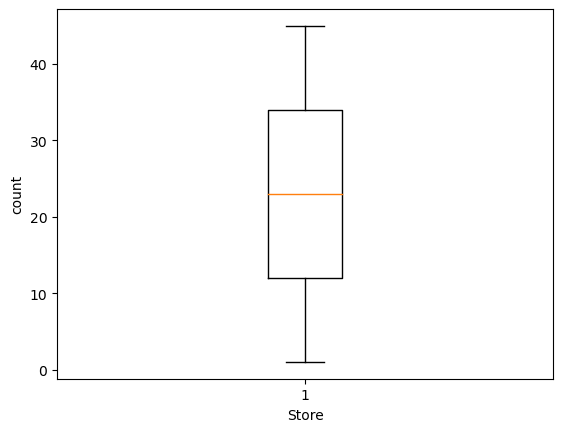

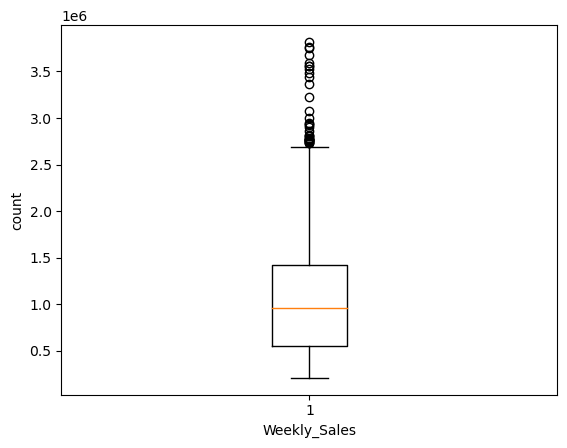

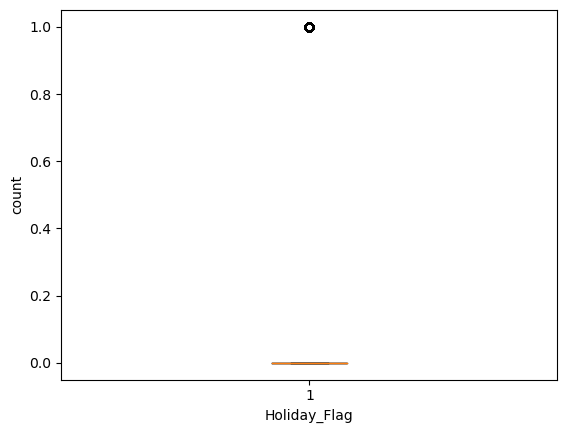

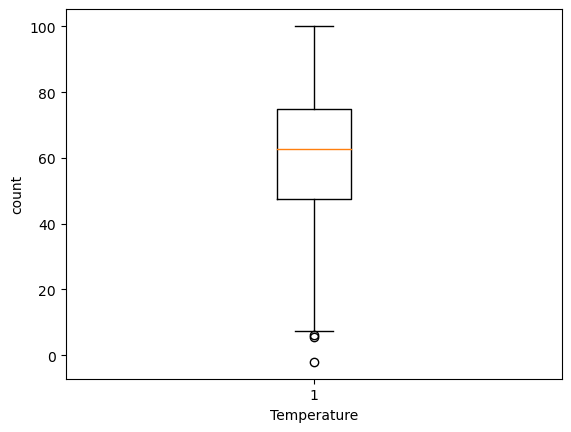

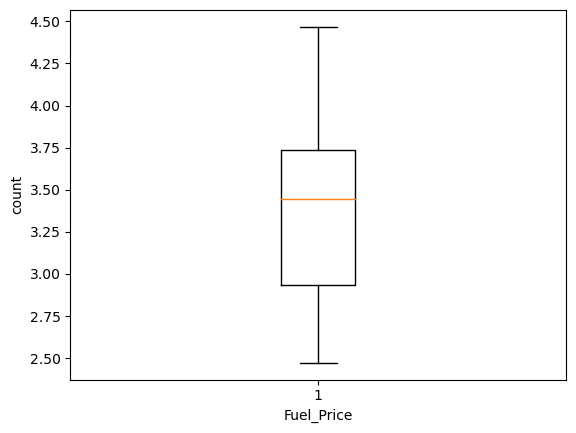

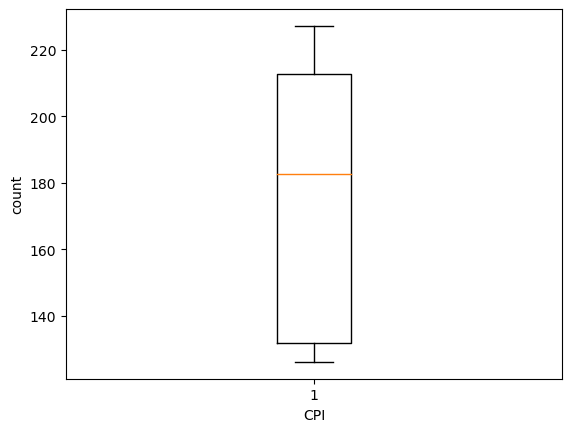

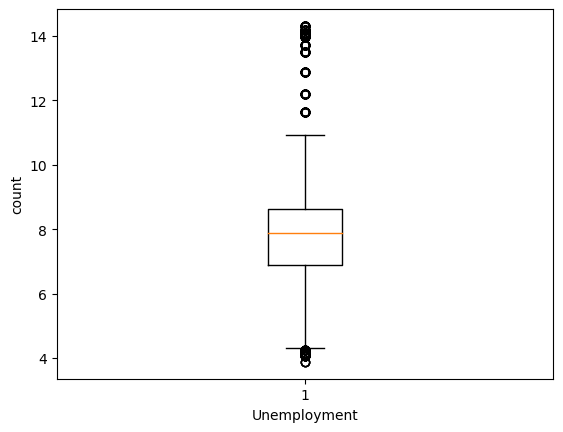

In [10]:
# Identification of Outliers 
for column in cols:
    if(df[column].dtypes=="int64" or df[column].dtypes=="float64"):
        plt.boxplot(df[column])
        plt.xlabel(column)
        plt.ylabel("count")
        plt.show()

In [11]:
# Dealing with outliers
outlier_columns=["Weekly_Sales", "Temperature", "Unemployment"]

In [12]:
for i in outlier_columns:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    LL=Q1-1.5*IQR
    UL=Q3+1.5*IQR
    df=df[(df[i]<=UL)&(df[i]>=LL)]

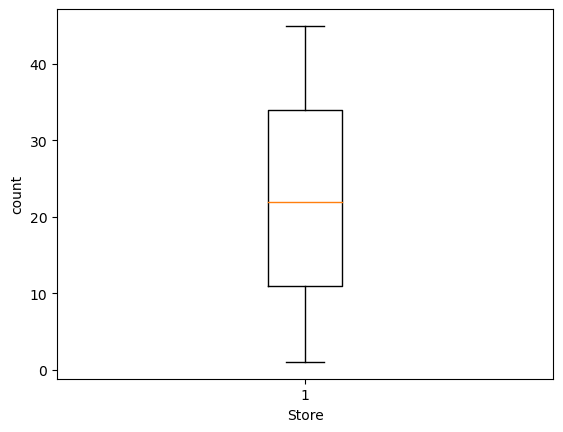

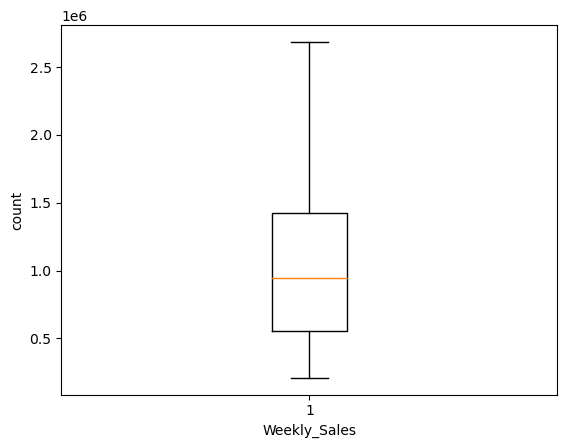

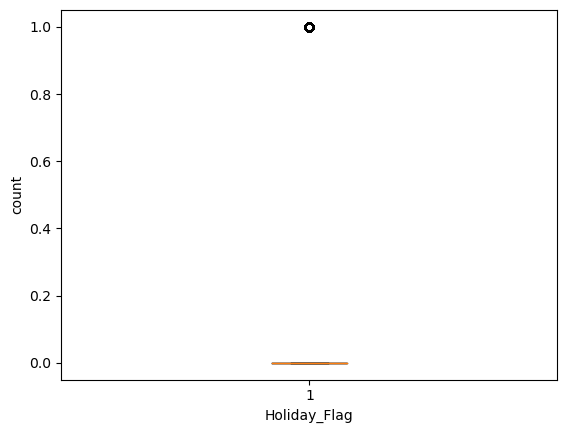

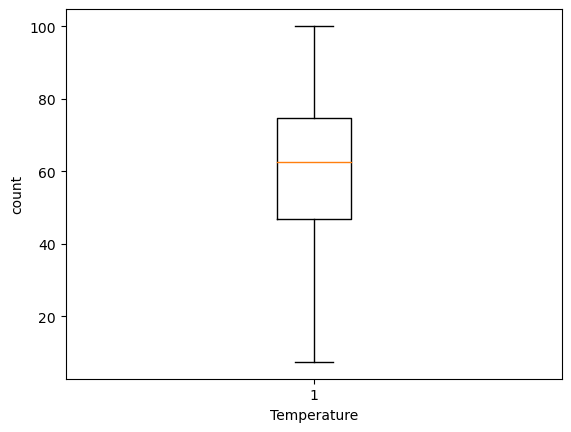

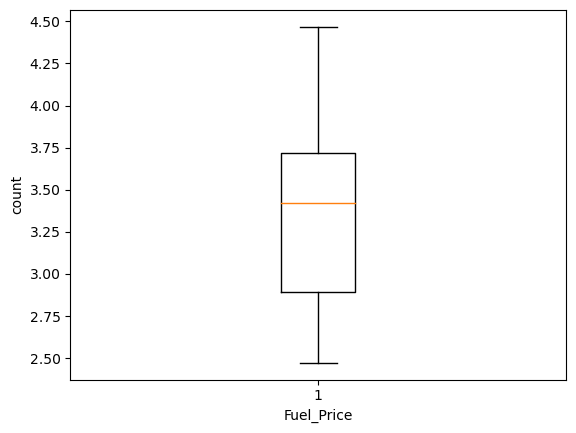

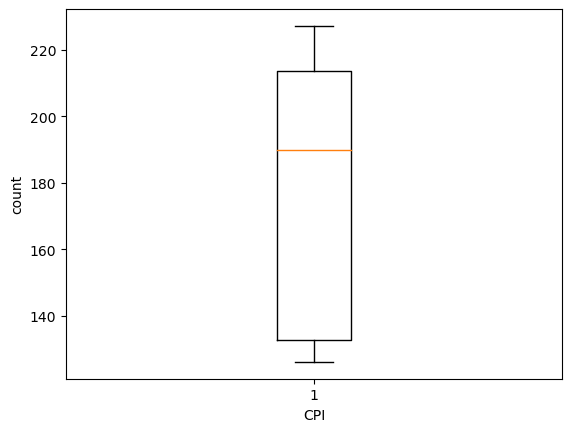

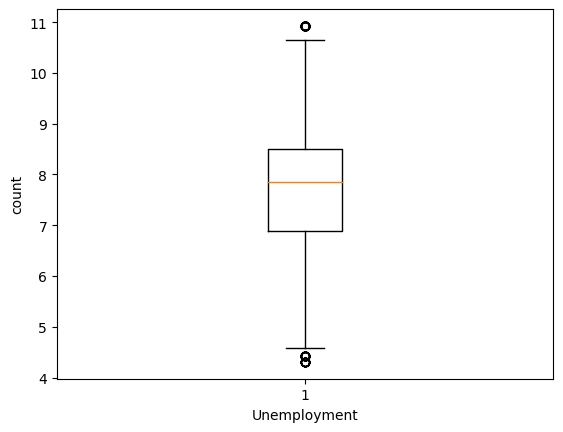

In [13]:
for column in cols:
    if(df[column].dtypes=="int64" or df[column].dtypes=="float64"):
        plt.boxplot(df[column])
        plt.xlabel(column)
        plt.ylabel("count")
        plt.show()

In [14]:
# Randomly store  nos were taken 
df_rand = df[(df.Store == 38) | (df.Store == 1) | (df.Store == 42)| (df.Store == 28) | (df.Store == 18)]
df_rand

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6001,42,2012-09-28,505978.46,0,82.52,3.966,131.043000,7.170
6002,42,2012-05-10,593162.53,0,80.88,4.132,131.075667,6.943
6003,42,2012-12-10,612379.90,0,76.03,4.468,131.108333,6.943
6004,42,2012-10-19,541406.98,0,72.71,4.449,131.149968,6.943


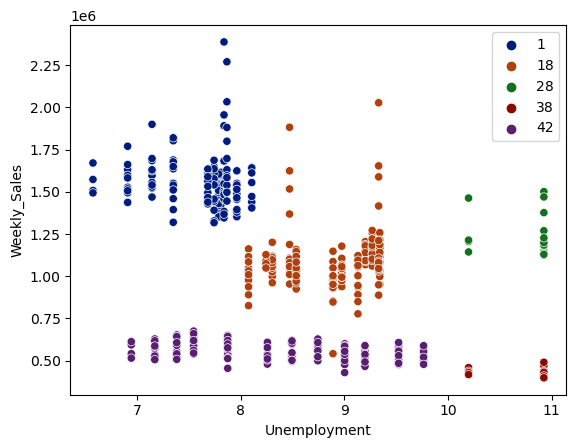

In [15]:
sns.scatterplot(x=df_rand["Unemployment"], y=df_rand["Weekly_Sales"], hue=df_rand["Store"], palette="dark", data=df_rand)
plt.legend(loc="upper right")
plt.show()

In [23]:
# The above graph tells us as Unemployment increases, weekly_sales decreases.
#  The most suffering store  due to Unemployment is store 38

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


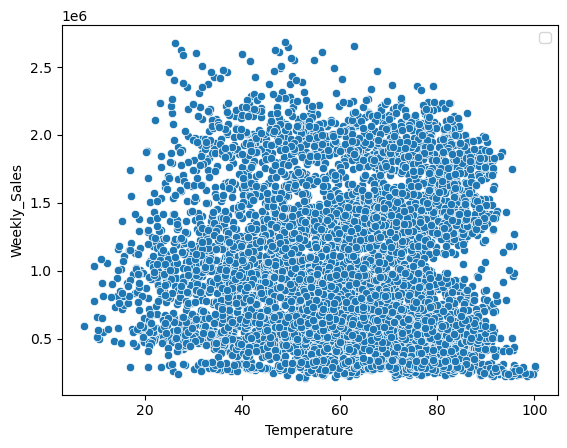

In [16]:
# Qn no 2

figsize=(20,20)
sns.scatterplot(x=df["Temperature"], y=df["Weekly_Sales"], palette="dark", data=df)
plt.legend(loc="upper right")
plt.show()

In [438]:
# When temperature decreases or increases, weekly_sales decreases. High amount of weekly sales occurred moderately at temperature 35-85 degree 

In [17]:
# Randomly taken store for showing the impact of CPI on weekly sales
df_rand_store1=df[((df.Store)==1) | ((df.Store)==40) | ((df.Store)==25) | ((df.Store)==16) | ((df.Store)==33)]
df_rand_store1

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
5672,40,2011-02-12,1059676.62,0,38.51,3.501,136.490933,4.420
5673,40,2011-09-12,1158708.98,0,34.48,3.470,136.503067,4.420
5674,40,2011-12-16,1198670.19,0,29.53,3.445,136.533516,4.420
5675,40,2011-12-23,1601585.70,0,24.46,3.413,136.588387,4.420


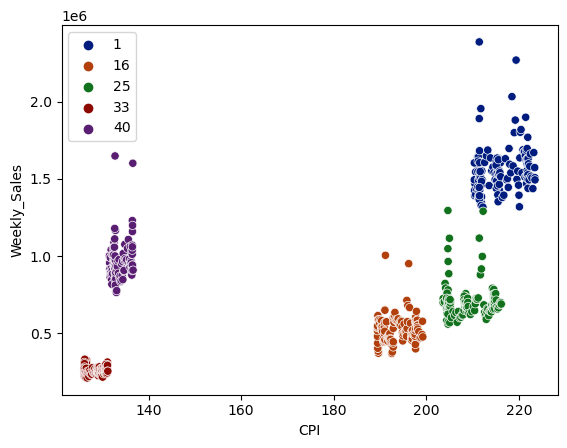

In [19]:
figsize=(20,40)
sns.scatterplot(x=df_rand_store1["CPI"], y=df_rand_store1["Weekly_Sales"],hue=df_rand_store1["Store"], palette="dark", data=df_rand_store1)
plt.legend(loc="upper left")
plt.show()

In [27]:
# In each store, CPI is not scattered which shows that CPI does not have any impact on weekly sales

In [20]:
# Top performing store through visualisation
df_store=df.groupby("Store")["Weekly_Sales"].sum().reset_index()
df_store


,Store,Weekly_Sales
0,1,2.224028e+08
1,2,2.687221e+08
2,3,5.758674e+07
3,4,2.446487e+08
4,5,4.547569e+07
5,6,2.210286e+08
6,7,8.104025e+07
7,8,1.299512e+08
8,9,7.778922e+07
9,10,2.556789e+08


In [21]:
df_store1=df_store[(df_store.Store)<10]
df_store2=df_store[((df_store.Store)>10) & ((df_store.Store)<20)]
df_store3=df_store[((df_store.Store)>20) & ((df_store.Store)<30)]
df_store4=df_store[((df_store.Store)>30) & ((df_store.Store)<40)]
df_store5=df_store[((df_store.Store)>40) & ((df_store.Store)<50)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


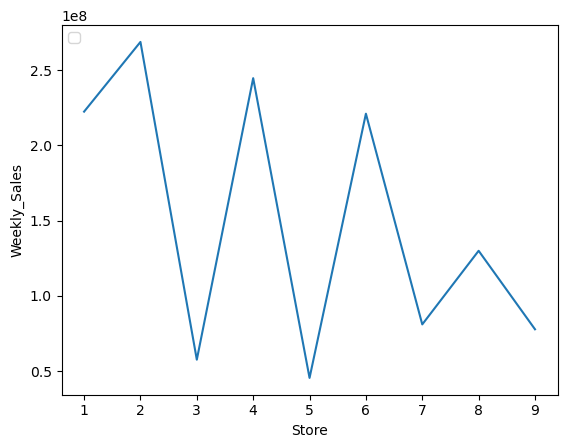

In [22]:
figsize=(20,40)
sns.lineplot(x=df_store1["Store"], y=df_store1["Weekly_Sales"], palette="dark", data=df_store1)
plt.legend(loc="upper left")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


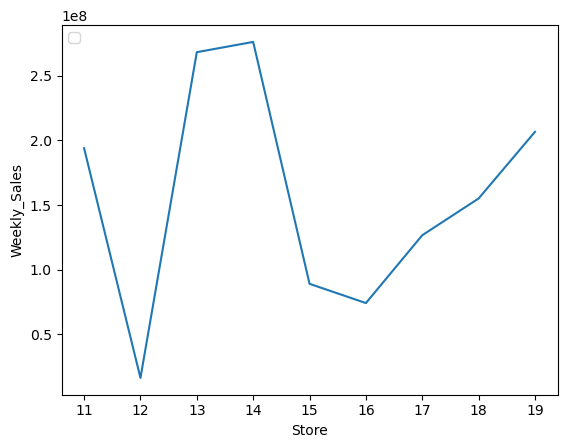

In [23]:
figsize=(20,40)
sns.lineplot(x=df_store2["Store"], y=df_store2["Weekly_Sales"], palette="dark", data=df_store2)
plt.legend(loc="upper left")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


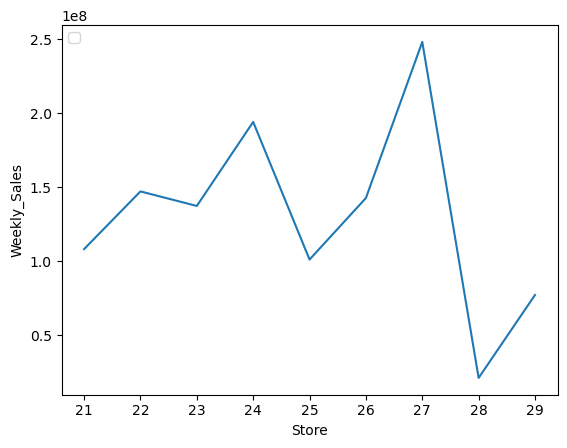

In [24]:
figsize=(20,40)
sns.lineplot(x=df_store3["Store"], y=df_store3["Weekly_Sales"], palette="dark", data=df_store3)
plt.legend(loc="upper left")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


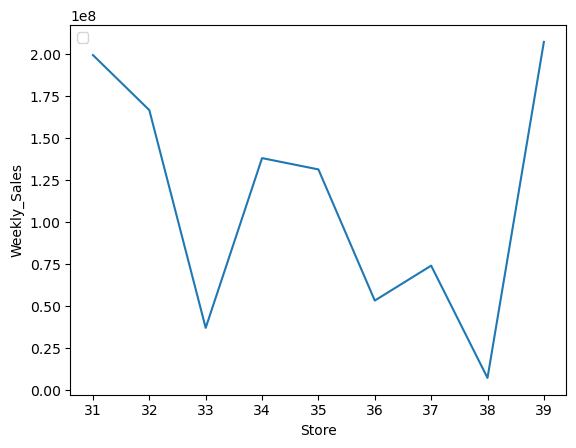

In [25]:
figsize=(20,40)
sns.lineplot(x=df_store4["Store"], y=df_store4["Weekly_Sales"], palette="dark", data=df_store4)
plt.legend(loc="upper left")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


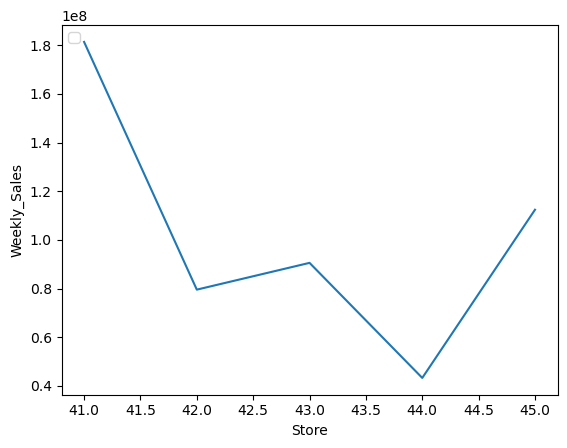

In [26]:
figsize=(20,40)
sns.lineplot(x=df_store5["Store"], y=df_store5["Weekly_Sales"], palette="dark", data=df_store5)
plt.legend(loc="upper left")
plt.show()

In [27]:
# From the above graphs, maximum weekly_sales of stores are as: 4,14,27,31,41
df_max=df_store[((df_store.Store)==4) | ((df_store.Store)==14) | ((df_store.Store)==27) | ((df_store.Store)==31) | ((df_store.Store)==41)]
df_max

,Store,Weekly_Sales
3,4,2.446487e+08
13,14,2.761276e+08
26,27,2.480387e+08
30,31,1.996139e+08
40,41,1.813419e+08


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


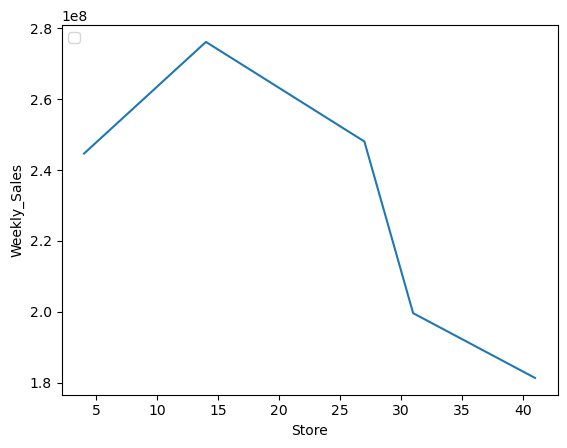

In [28]:
figsize=(20,40)
sns.lineplot(x=df_max["Store"], y=df_max["Weekly_Sales"], palette="dark", data=df_max)
plt.legend(loc="upper left")
plt.show()

In [29]:
# 1)e) Top performing stores through coding

top=df.groupby("Store")["Weekly_Sales"].sum().reset_index()
top_store=top["Weekly_Sales"].max()
np.where(top["Weekly_Sales"]==280023734.81)
top.loc[19]["Weekly_Sales"]

280023734.81

In [30]:
# 1)e) Worst performing stores through coding

worst_performing_store=top["Weekly_Sales"].min()
np.where(top["Weekly_Sales"]==7347378.89)
top.loc[37]["Weekly_Sales"]

7347378.89

In [31]:
# Significant difference between the weekly sales is

a=top.loc[19]["Weekly_Sales"]-top.loc[37]["Weekly_Sales"]
a

272676355.92

In [ ]:
# Q.No2  Weekly sales shows trend or not

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


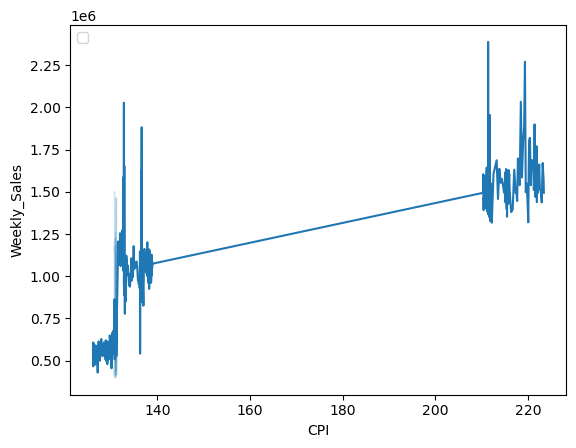

In [32]:
figsize=(20,40)
sns.lineplot(x=df_rand["CPI"], y=df_rand["Weekly_Sales"], palette="dark", data=df_rand)
plt.legend(loc="upper left")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


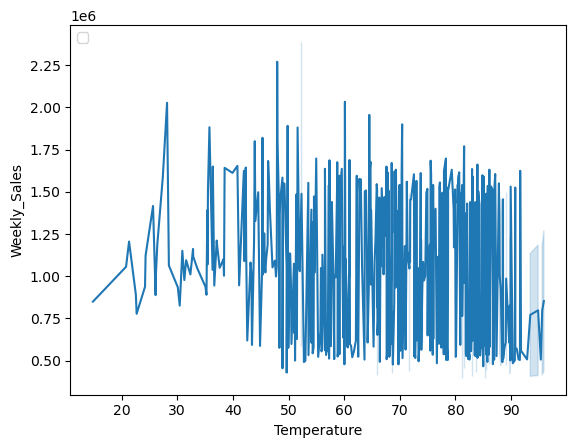

In [33]:
figsize=(20,40)
sns.lineplot(x=df_rand["Temperature"], y=df_rand["Weekly_Sales"], palette="dark", data=df_rand)
plt.legend(loc="upper left")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


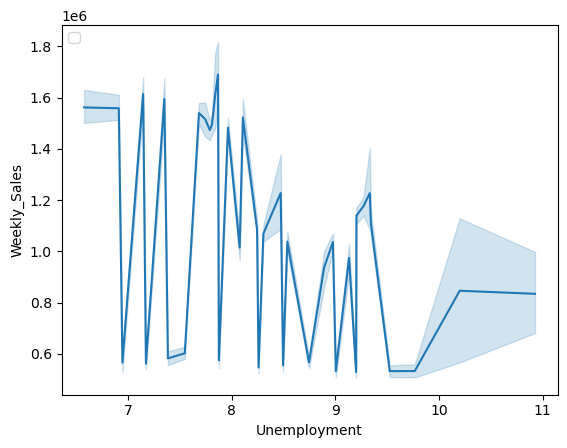

In [35]:
figsize=(20,40)
sns.lineplot(x=df_rand["Unemployment"], y=df_rand["Weekly_Sales"], palette="dark", data=df_rand)
plt.legend(loc="upper left")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


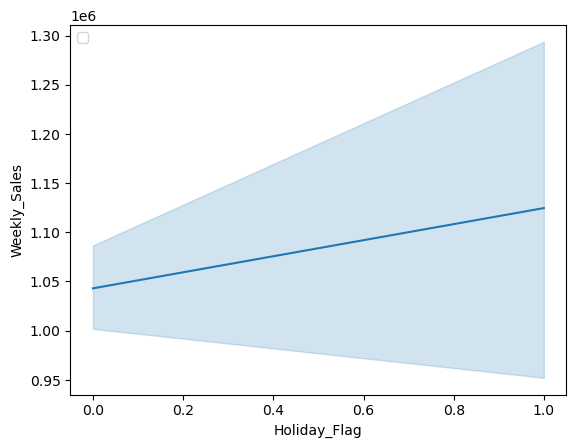

In [34]:
figsize=(20,40)
sns.lineplot(x=df_rand["Holiday_Flag"], y=df_rand["Weekly_Sales"], palette="dark", data=df_rand)
plt.legend(loc="upper left")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


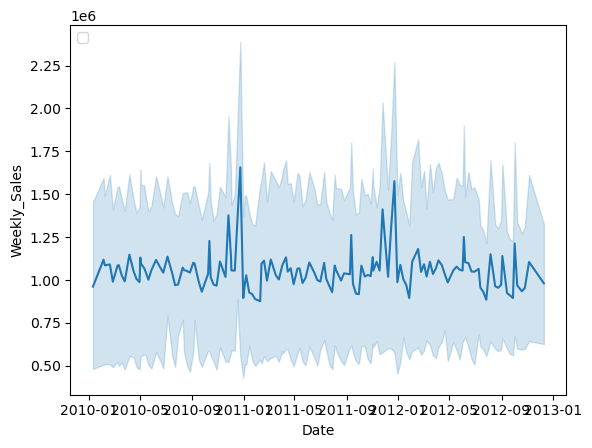

In [36]:
figsize=(20,40)
sns.lineplot(x=df_rand["Date"], y=df_rand["Weekly_Sales"], palette="dark", data=df_rand)
plt.legend(loc="upper left")
plt.show()

In [ ]:
# Based on the above graphs, trend occured due to CPI and it occurs at the every month of January